# Initial Model Creation

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Creation of Dataset 

In [2]:
eyes_centre_df = pd.read_csv('csvs/eyes_centre.csv')

In [3]:
eyes_centre_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z155,x156,y156,z156,x157,y157,z157,x158,y158,z158
0,0.353829,0.412024,0.007302,0.388435,0.580216,0.004960,0.393242,0.417560,0.001578,0.423449,...,0.069627,0.370307,0.395598,0.069764,0.363343,0.412888,0.068732,0.373530,0.424579,0.069699
1,0.355154,0.411646,0.007512,0.388933,0.576822,0.003629,0.394015,0.417476,0.002163,0.424489,...,0.038883,0.370656,0.393507,0.039101,0.363216,0.410732,0.038029,0.373380,0.423351,0.038816
2,0.354903,0.412436,0.008686,0.388782,0.577849,0.003263,0.393785,0.417620,0.003020,0.423808,...,0.031290,0.370756,0.393201,0.031333,0.363280,0.410399,0.030707,0.373355,0.422981,0.031420
3,0.355111,0.412573,0.007989,0.388889,0.578071,0.003325,0.393742,0.417326,0.002597,0.423884,...,0.049843,0.370269,0.394387,0.050005,0.362773,0.410931,0.049118,0.372414,0.423887,0.049919
4,0.354219,0.412320,0.008253,0.388217,0.577741,0.003598,0.393243,0.417388,0.002604,0.423359,...,0.060965,0.370454,0.393503,0.060847,0.363163,0.410339,0.060048,0.372997,0.422415,0.061159


In [4]:
eyes_up_df = pd.read_csv('csvs/eyes_up.csv')
eyes_up_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z155,x156,y156,z156,x157,y157,z157,x158,y158,z158
0,0.333988,0.411490,0.011932,0.370105,0.573393,0.001365,0.370994,0.413280,0.005020,0.402500,...,0.077458,0.347944,0.395126,0.077345,0.341435,0.410950,0.077538,0.350483,0.422373,0.077973
1,0.336973,0.402914,0.012121,0.371503,0.570659,0.000678,0.372996,0.407994,0.005481,0.401983,...,0.029051,0.350979,0.387710,0.029021,0.344133,0.402383,0.028477,0.352649,0.414036,0.029473
2,0.336036,0.392597,0.013089,0.369558,0.565779,-0.000246,0.372852,0.397786,0.006711,0.402659,...,0.048156,0.353891,0.379014,0.048365,0.347406,0.394129,0.047774,0.356279,0.404655,0.048920
3,0.335603,0.389605,0.014740,0.369567,0.563366,-0.002289,0.372847,0.394508,0.008134,0.401343,...,0.075933,0.354003,0.375609,0.076224,0.347509,0.391415,0.075529,0.356834,0.402228,0.076582
4,0.335919,0.388167,0.016137,0.370257,0.563074,-0.002246,0.372982,0.392983,0.008984,0.401239,...,0.070643,0.354728,0.374375,0.070535,0.348476,0.389755,0.070201,0.357390,0.400326,0.070989


In [5]:
eyes_down_df = pd.read_csv('csvs/eyes_down.csv')
eyes_down_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z155,x156,y156,z156,x157,y157,z157,x158,y158,z158
0,0.309200,0.422834,0.016014,0.336463,0.568220,0.007866,0.342729,0.423346,0.006284,0.368900,...,0.012815,0.325870,0.413709,0.013139,0.320253,0.427655,0.013350,0.328442,0.436482,0.013064
1,0.309306,0.424735,0.015378,0.338464,0.569799,0.006064,0.343210,0.424277,0.006077,0.370003,...,-0.038292,0.326513,0.412823,-0.038033,0.320656,0.426720,-0.038365,0.328772,0.435986,-0.038848
2,0.309656,0.423471,0.013915,0.337970,0.569129,0.007233,0.343558,0.423924,0.004913,0.369801,...,0.020499,0.325553,0.413752,0.020800,0.320124,0.427722,0.020420,0.328397,0.436207,0.020012
3,0.309499,0.423161,0.013995,0.338683,0.569573,0.007095,0.343584,0.423580,0.004981,0.370330,...,0.026812,0.325492,0.413516,0.027270,0.319914,0.427862,0.026741,0.328315,0.436610,0.026334
4,0.309262,0.423274,0.014410,0.338190,0.570220,0.006976,0.343556,0.424087,0.005268,0.369818,...,0.024729,0.325865,0.413106,0.025531,0.320071,0.427515,0.024717,0.328593,0.436543,0.024763


In [6]:
eyes_right_df = pd.read_csv('csvs/eyes_right.csv')
eyes_right_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z155,x156,y156,z156,x157,y157,z157,x158,y158,z158
0,0.330621,0.429271,0.022035,0.361564,0.590437,0.003946,0.368497,0.431110,0.011304,0.398093,...,-0.028703,0.358505,0.410009,-0.028765,0.351580,0.428795,-0.028950,0.362552,0.440130,-0.028543
1,0.335127,0.428640,0.019544,0.364601,0.588578,0.003714,0.371419,0.429296,0.009903,0.399238,...,-0.064655,0.359622,0.411130,-0.065345,0.352261,0.427237,-0.065547,0.361609,0.438775,-0.065195
2,0.333607,0.428931,0.019803,0.363435,0.587633,0.003876,0.370529,0.429817,0.010015,0.398441,...,-0.035465,0.360253,0.410606,-0.036101,0.353696,0.426793,-0.036115,0.362915,0.437679,-0.035964
3,0.333875,0.429014,0.020662,0.362803,0.587691,0.003541,0.370447,0.429685,0.010709,0.397531,...,-0.024987,0.359294,0.412171,-0.025763,0.352915,0.428218,-0.025794,0.361881,0.439069,-0.025581
4,0.333573,0.429184,0.019990,0.363198,0.587663,0.004314,0.370210,0.429645,0.009979,0.398150,...,-0.051699,0.359415,0.411192,-0.052463,0.353063,0.427153,-0.052313,0.362118,0.437790,-0.052267


In [7]:
eyes_left_df = pd.read_csv('csvs/eyes_left.csv')
eyes_left_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z155,x156,y156,z156,x157,y157,z157,x158,y158,z158
0,0.298961,0.414068,0.023548,0.326931,0.566103,0.009932,0.332364,0.418567,0.010641,0.357460,...,-0.046187,0.307329,0.401624,-0.045912,0.302435,0.411959,-0.046721,0.307170,0.421809,-0.046758
1,0.299323,0.412115,0.022109,0.329094,0.566725,0.010322,0.332298,0.417180,0.009320,0.358453,...,-0.047425,0.309353,0.403211,-0.048748,0.304123,0.414073,-0.048465,0.309385,0.423894,-0.048387
2,0.299316,0.412470,0.023832,0.327669,0.566526,0.010111,0.332198,0.417723,0.010551,0.356764,...,-0.018614,0.308427,0.402264,-0.019808,0.303258,0.413015,-0.019539,0.308525,0.422561,-0.019845
3,0.299083,0.412912,0.023154,0.327539,0.566125,0.010346,0.332267,0.417387,0.009942,0.356988,...,-0.018614,0.308427,0.402264,-0.019808,0.303258,0.413015,-0.019539,0.308525,0.422561,-0.019845
4,0.298361,0.412804,0.023143,0.327510,0.566639,0.011297,0.331466,0.417433,0.009633,0.356973,...,-0.047901,0.308071,0.402444,-0.048934,0.302870,0.413103,-0.048881,0.308085,0.423032,-0.048944


In [8]:
all_dfs = [eyes_up_df, eyes_down_df, eyes_left_df, eyes_right_df, eyes_centre_df]

for i in range(len(all_dfs)):
    all_dfs[i]['state'] = i

## Put it all together

In [9]:
all_data = pd.concat(all_dfs)

In [10]:
all_data['state'] = all_data['state'].astype('int')
y = np.asarray(all_data['state'])
y [0:5]

array([0, 0, 0, 0, 0])

In [11]:
just_x_df = all_data.drop('state', axis = 1)

In [12]:
just_x_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z155,x156,y156,z156,x157,y157,z157,x158,y158,z158
0,0.333988,0.411490,0.011932,0.370105,0.573393,0.001365,0.370994,0.413280,0.005020,0.402500,...,0.077458,0.347944,0.395126,0.077345,0.341435,0.410950,0.077538,0.350483,0.422373,0.077973
1,0.336973,0.402914,0.012121,0.371503,0.570659,0.000678,0.372996,0.407994,0.005481,0.401983,...,0.029051,0.350979,0.387710,0.029021,0.344133,0.402383,0.028477,0.352649,0.414036,0.029473
2,0.336036,0.392597,0.013089,0.369558,0.565779,-0.000246,0.372852,0.397786,0.006711,0.402659,...,0.048156,0.353891,0.379014,0.048365,0.347406,0.394129,0.047774,0.356279,0.404655,0.048920
3,0.335603,0.389605,0.014740,0.369567,0.563366,-0.002289,0.372847,0.394508,0.008134,0.401343,...,0.075933,0.354003,0.375609,0.076224,0.347509,0.391415,0.075529,0.356834,0.402228,0.076582
4,0.335919,0.388167,0.016137,0.370257,0.563074,-0.002246,0.372982,0.392983,0.008984,0.401239,...,0.070643,0.354728,0.374375,0.070535,0.348476,0.389755,0.070201,0.357390,0.400326,0.070989


In [13]:
X = np.asarray(just_x_df)
X[0:5]

array([[0.3339881 , 0.41149047, 0.01193178, ..., 0.35048304, 0.42237328,
        0.07797294],
       [0.3369728 , 0.40291372, 0.01212116, ..., 0.35264905, 0.41403591,
        0.02947296],
       [0.33603564, 0.39259711, 0.01308923, ..., 0.35627897, 0.40465479,
        0.04891964],
       [0.33560348, 0.38960522, 0.01474031, ..., 0.35683407, 0.40222797,
        0.07658206],
       [0.33591944, 0.38816726, 0.01613659, ..., 0.35739027, 0.40032582,
        0.0709888 ]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (671, 477) (671,)
Test set: (168, 477) (168,)


In [15]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [16]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [17]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
fit_models


{'lr': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))]),
 'rc': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridgeclassifier', RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
         max_iter=None, normalize=False, random_state=None, solver='auto',
         tol=0.001))]),
 'rf': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='au

In [19]:
X_test

array([[ 0.35402101,  0.41070986,  0.00875056, ...,  0.37265593,
         0.42050225,  0.05662277],
       [ 0.33404067,  0.42882085,  0.0213065 , ...,  0.36276767,
         0.43630176, -0.06787415],
       [ 0.3493861 ,  0.43602997,  0.0141319 , ...,  0.3747944 ,
         0.4461556 , -0.07890731],
       ...,
       [ 0.30932945,  0.42671922,  0.0150757 , ...,  0.32774644,
         0.43949424,  0.00796815],
       [ 0.32955843,  0.44888106,  0.0252602 , ...,  0.34050513,
         0.45883728, -0.07539032],
       [ 0.34915629,  0.43559164,  0.01495584, ...,  0.37349063,
         0.4466501 , -0.05445588]])

In [20]:
yhat = fit_models['rc'].predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [22]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 1.0
rc 1.0
rf 1.0
gb 1.0


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36

   micro avg       1.00      1.00      1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168

Confusion matrix, without normalization
[[31  0]
 [ 0 32]]


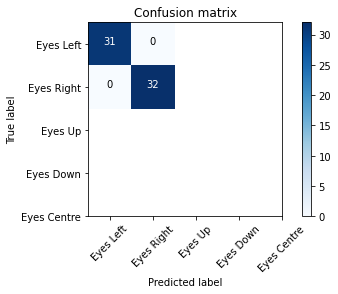

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Eyes Left','Eyes Right', 'Eyes Up', 'Eyes Down', 'Eyes Centre'],normalize= False,  title='Confusion matrix')

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

1.0

In [41]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

1.0

In [43]:
import pickle
with open('smile_neutral_rf.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [44]:
with open('smile_neutral_rf.pkl', 'rb') as f:
    model = pickle.load(f)

In [26]:
import cv2
import mediapipe
import numpy as np
import csv
cap = cv2.VideoCapture(0)

# facemesh

faceModule = mediapipe.solutions.face_mesh
mp_drawing = mediapipe.solutions.drawing_utils # Drawing helpers

circleDrawingSpec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))
lineDrawingSpec = mp_drawing.DrawingSpec(thickness=1, color=(0,255,0))
 
with faceModule.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = face.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        if results.multi_face_landmarks != None:
            for faceLandmarks in results.multi_face_landmarks:
                point_values = []

                for i in range(0, 468):
                    pt1 = faceLandmarks.landmark[i]

                    point_values.append(pt1.x)
                    point_values.append(pt1.y)
                    point_values.append(pt1.z)
                
                
                 # Make Detections
                X = pd.DataFrame([point_values])
                body_language_class = model.predict(X)[0]
                print(body_language_class)
                
                mp_drawing.draw_landmarks(image, faceLandmarks, faceModule.FACEMESH_CONTOURS, circleDrawingSpec, lineDrawingSpec)
   

                # Display Class
                cv2.putText(image, 'CLASS'
                            , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, str(body_language_class)
                            , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

ValueError: operands could not be broadcast together with shapes (1,1404) (477,) (1,1404) 